# Task
*Using Python with different libraries, load any simple dataset and create three different types of visualizations, then write brief observations for each chart to explain what insights you gained from the data.*


### *Injesting the data set and printing it as a pandas DataFrame*

In [1]:
import pandas as pd

df = pd.read_csv('Pokemon.csv')
print(df.to_string())


       #                       Name    Type 1    Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary
0      1                  Bulbasaur     Grass    Poison    318   45      49       49       65       65     45           1      False
1      2                    Ivysaur     Grass    Poison    405   60      62       63       80       80     60           1      False
2      3                   Venusaur     Grass    Poison    525   80      82       83      100      100     80           1      False
3      3      VenusaurMega Venusaur     Grass    Poison    625   80     100      123      122      120     80           1      False
4      4                 Charmander      Fire       NaN    309   39      52       43       60       50     65           1      False
5      5                 Charmeleon      Fire       NaN    405   58      64       58       80       65     80           1      False
6      6                  Charizard      Fire    Flying    534   78  

### *Checking for Null/Missing Values*

In [2]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

*The above operation performed to check for missing values helps us infer that less than half the Pokemons in the data set have a second type.*

### *Frequency Distribution of Pokemon Types - BarGraph*

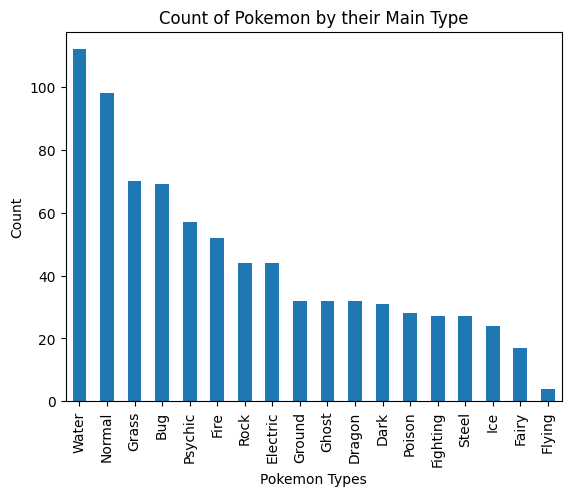

In [3]:
import matplotlib.pyplot as plt

df['Type 1'].value_counts().plot(kind='bar')

plt.title('Count of Pokemon by their Main Type')
plt.xlabel('Pokemon Types')
plt.ylabel('Count')
plt.show()



## Here are some quick insights from the barchart 📊:

- Water is the most common Pokémon type, with over 110 Pokémon.
- Normal is the second most common, close to 100.
- Grass, Bug, and Psychic are also relatively common, each with around 70 Pokémon.
- Fairy and especially Flying are rare, with fewer than 20 and almost no Flying-type Pokémon as a main type.
- Overall, there’s a wide variety of types, but a few (Water, Normal, Grass) dominate the distribution.

## *Pokemon Distribution by Generation - PieChart*

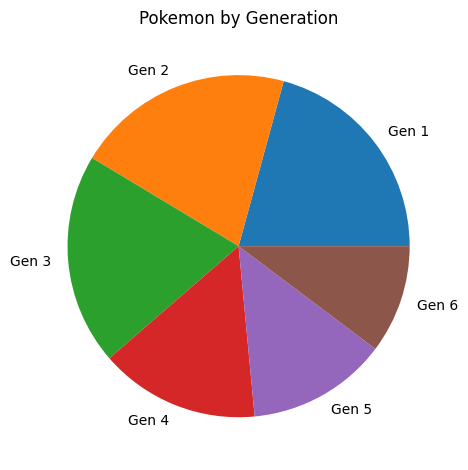

In [4]:
import numpy as np

gens = np.array((df['Generation'].value_counts()))
mylabels = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6'] 

plt.pie(gens, labels = mylabels)
plt.title('Pokemon by Generation')
plt.tight_layout()
plt.show()



## Here are some short insights from this pie chart:

- Gen 1, Gen 2, and Gen 3 have the largest share of Pokémon, each contributing around one-fifth of the total.
- Gen 4 and Gen 5 have a moderate number of Pokémon, smaller than the first three gens.
- Gen 6 has the smallest share, with noticeably fewer Pokémon compared to earlier generations.
- Overall, the early generations (1–3) dominate the Pokémon distribution, while later generations introduced fewer new Pokémon.

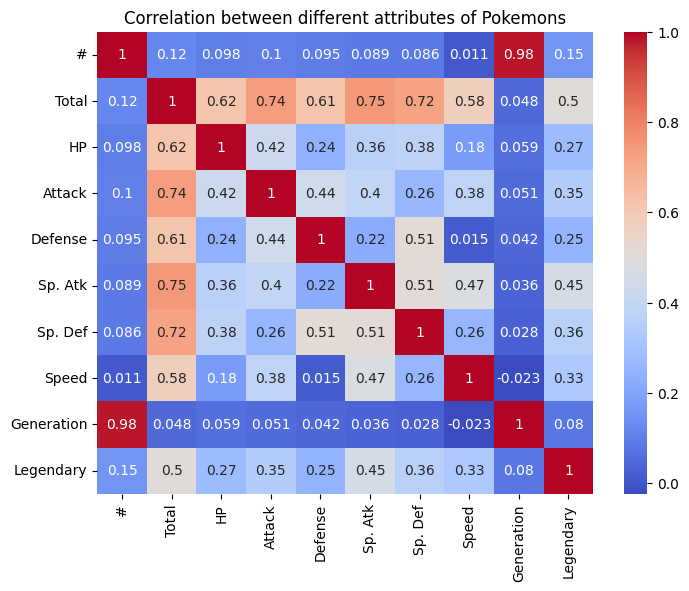

In [5]:
import seaborn as sns

corr_matrix = df.corr(numeric_only= True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.title('Correlation between different attributes of Pokemons')
plt.show()


## Here are some quick insights from the heatmap:

- Total stat is strongly correlated with most attributes, especially Attack (0.74), Sp. Atk (0.75), and Sp. Def (0.72). This makes sense since total is the sum of all stats.
- Attack and Sp. Atk have only a weak correlation (0.40), meaning offensive styles vary.
- Defense and Sp. Def show a moderate correlation (0.51), so bulky Pokémon tend to have both types of defenses.
- Legendary status is moderately correlated with Total (0.50), showing Legendaries usually have higher stats.
- Generation has very little correlation with stats, meaning power is not strictly tied to generation.
- Overall: A Pokémon’s total power is the best summary of its attributes, while being Legendary generally indicates higher stats but not necessarily tied to generation.

### *Visualisation of Pokemon Types - WordCloud*

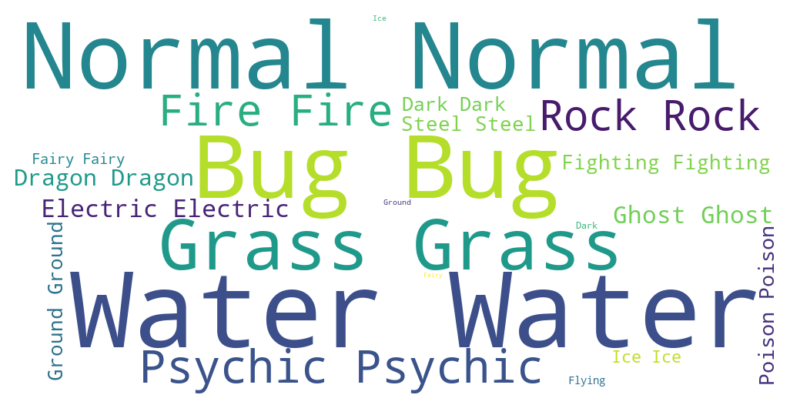

In [6]:
from wordcloud import WordCloud

#Generate the WordCloud
text = ' '.join(df['Type 1'])
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(text)

#Display the WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')  #Remove Axes
plt.show()